In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
X,y=make_moons(100,noise=.25,random_state=2)

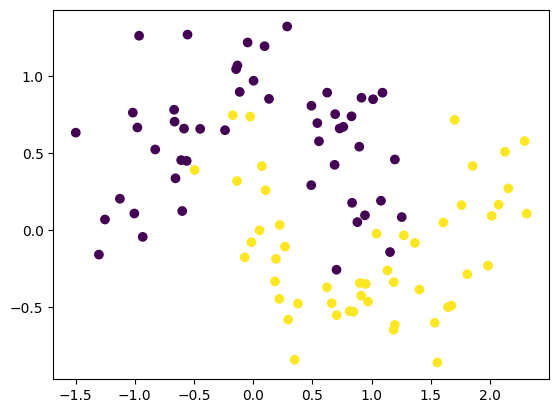

In [59]:
plt.scatter(X[:,0],X[:,1],c=y)

In [60]:
model=Sequential()
model.add(Dense(128,input_dim=2,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               384       
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history=model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

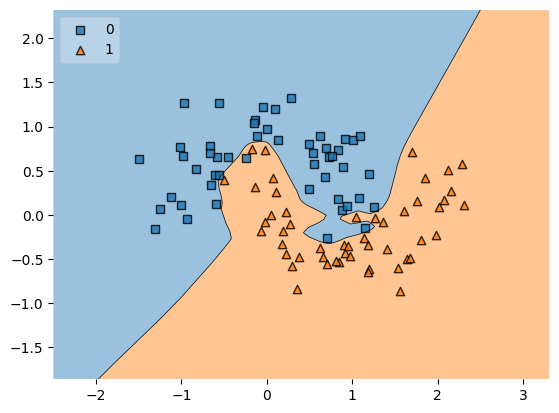

In [62]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

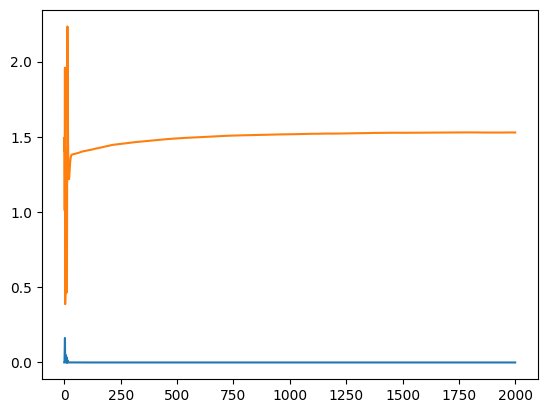

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**Regularization L1 & L2**

In [57]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(1,activation="sigmoid"))

In [58]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

RuntimeError: ignored

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

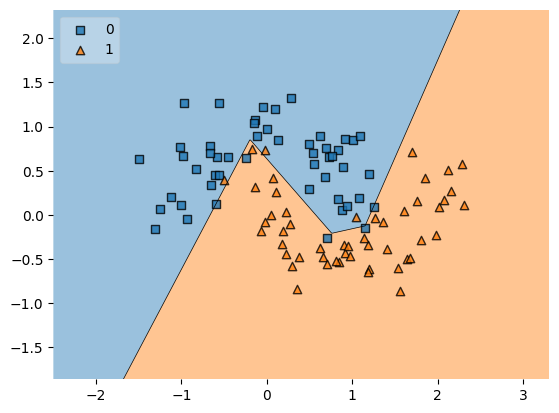

In [22]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)

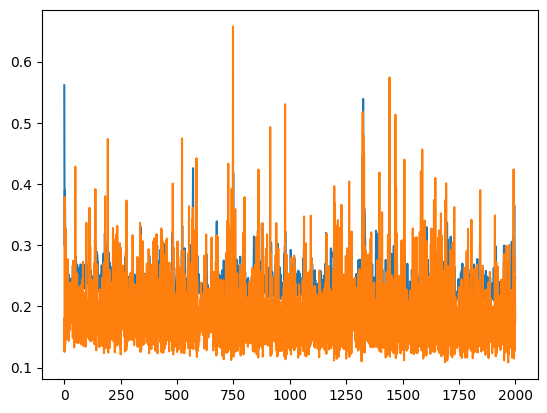

In [23]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

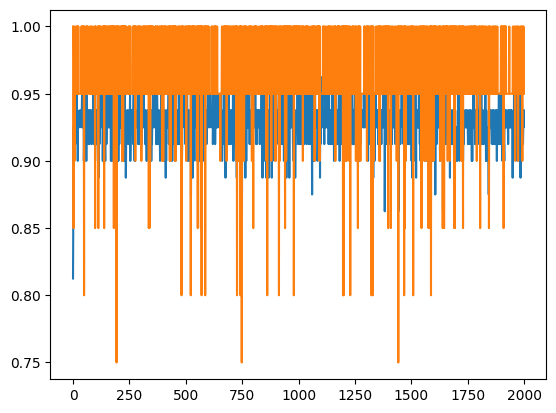

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**L1 regularization**

In [26]:
model3=Sequential()
model3.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model3.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model3.add(Dense(1,activation="sigmoid"))

In [29]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history3=model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

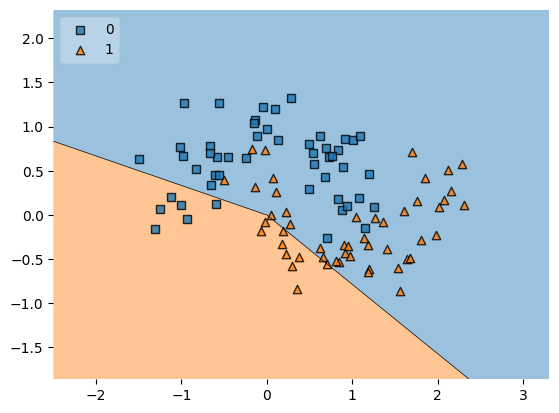

In [28]:
plot_decision_regions(X,y.astype('int'),clf=model3,legend=2)

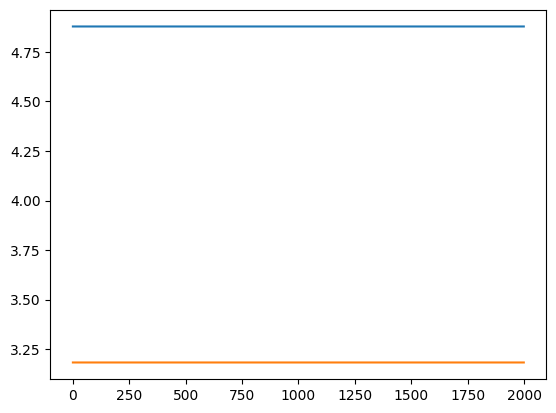

In [31]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [43]:
model_weight_layers2=model3.get_weights()[0].reshape(256)


<Axes: >

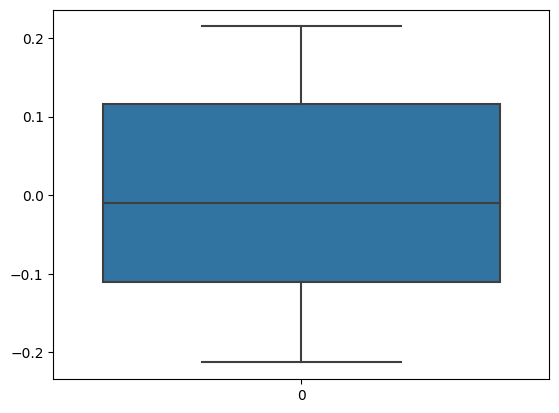

In [44]:
sns.boxplot(model_weight_layers2)

<ipython-input-49-2fd49d47b60e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layers2)


<Axes: ylabel='Density'>

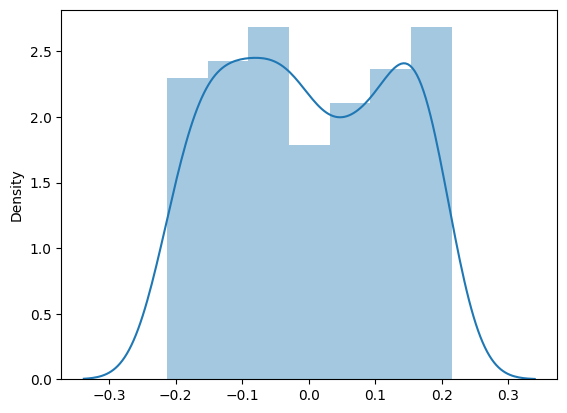

In [49]:
sns.distplot(model_weight_layers2)

In [50]:
model_weight_layers2.min()

-0.2130546

In [51]:
model_weight_layers2.max()

0.21473463